🔬 Phase 7: Starting Spectrum Analysis (This may take 2-3 mins)...
Testing Constant: Baseline (0.0) ... Mean Peak Score: 69.6 ± 14.5
Testing Constant: Noise (-0.05) ... Mean Peak Score: 83.1 ± 20.3
Testing Constant: ZETA (-0.0833) ... Mean Peak Score: 130.5 ± 54.2
Testing Constant: Strong (-0.1) ... Mean Peak Score: 120.1 ± 39.1
Testing Constant: Extreme (-0.2) ... Mean Peak Score: 177.5 ± 86.4


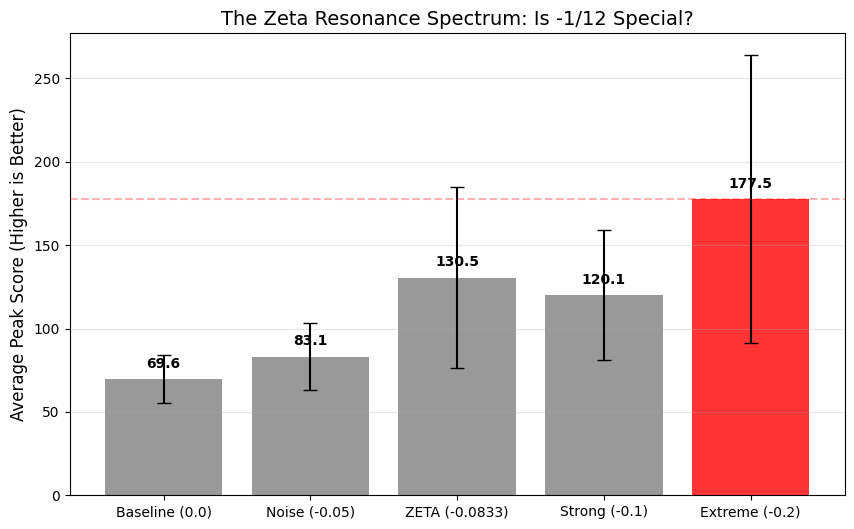

🚀 Spectrum Analysis Complete.


In [ ]:
# --- Phase 7: The Zeta Spectrum Analysis (寻找上帝频率) ---
# 严谨验证：对比不同常数下的表现，确认 -1/12 是否具有特殊性

import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # 进度条

# 1. 封装训练函数 (Standardized Test Unit)
def run_experiment(zeta_val, trials=10, episodes=80):
    """
    zeta_val: 待测试的宇宙常数
    trials: 重复实验次数 (消除随机误差)
    """
    final_scores = []

    for t in range(trials):
        # --- 模型定义 (动态注入 Zeta 常数) ---
        class DynamicHologram(nn.Module):
            def __init__(self):
                super().__init__()
                # 初始化为测试值
                self.hologram = nn.Parameter(torch.full((4,), zeta_val))
            def forward(self, x):
                # 投影公式使用测试值
                projection = torch.matmul(x, self.hologram) + zeta_val
                projection = projection.unsqueeze(1)
                prob_right = torch.sigmoid(projection)
                return torch.cat([1.0 - prob_right, prob_right], dim=1)

        # --- 优化器定义 ---
        class DynamicZetaOpt(optim.AdamW):
            def __init__(self, params, lr=0.01):
                super().__init__(params, lr=lr)
            @torch.no_grad()
            def step(self, closure=None):
                loss = super().step(closure)
                for group in self.param_groups:
                    for p in group['params']:
                        if p.grad is None: continue
                        if torch.norm(p.grad) > 0.5: # 保持 Phase 6 的阈值
                            unit_grad = p.grad / (torch.norm(p.grad) + 1e-9)
                            # 瞬移步长使用测试值
                            p.data.add_(zeta_val * unit_grad)
                return loss

        # --- 训练 ---
        env = gym.make('CartPole-v1')
        policy = DynamicHologram()
        optimizer = DynamicZetaOpt(policy.parameters(), lr=0.01)

        best_score_in_trial = 0

        for i_ep in range(episodes):
            state, _ = env.reset()
            log_probs = []
            rewards = []

            for _ in range(500):
                state_t = torch.from_numpy(state).float().unsqueeze(0)
                probs = policy(state_t)
                action = torch.multinomial(probs, 1).item()
                log_probs.append(torch.log(probs[0, action]))
                state, reward, terminated, truncated, _ = env.step(action)
                rewards.append(reward)
                if terminated or truncated: break

            score = sum(rewards)
            best_score_in_trial = max(best_score_in_trial, score)

            # Update
            R = 0
            returns = []
            for r in rewards[::-1]:
                R = r + 0.99 * R
                returns.insert(0, R)
            returns = torch.tensor(returns)
            if len(returns) > 1:
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)

            loss = []
            for log_prob, R in zip(log_probs, returns):
                loss.append(-log_prob * R)
            if loss:
                optimizer.zero_grad()
                torch.stack(loss).sum().backward()
                optimizer.step()

        final_scores.append(best_score_in_trial)
        env.close()

    return np.mean(final_scores), np.std(final_scores)

# 2. 定义频谱 (The Spectrum)
candidates = {
    "Baseline (0.0)": 0.0,
    "Noise (-0.05)": -0.05,
    "ZETA (-0.0833)": -1.0/12.0,  # THE MAGIC NUMBER
    "Strong (-0.1)": -0.1,
    "Extreme (-0.2)": -0.2
}

results = {}
errors = {}

print("🔬 Phase 7: Starting Spectrum Analysis (This may take 2-3 mins)...")

# 3. 开始扫频
for name, val in candidates.items():
    print(f"Testing Constant: {name} ...", end="")
    # 每个常数跑 15 次实验，取平均表现
    mean_score, std_dev = run_experiment(val, trials=15, episodes=60)
    results[name] = mean_score
    errors[name] = std_dev
    print(f" Mean Peak Score: {mean_score:.1f} ± {std_dev:.1f}")

# 4. 绘制频谱图 (The Resonance Curve)
plt.figure(figsize=(10, 6))
names = list(results.keys())
means = list(results.values())
stds = list(errors.values())

# 找到最高点
max_idx = np.argmax(means)
colors = ['gray'] * len(names)
colors[max_idx] = 'red' # 高亮冠军

bars = plt.bar(names, means, yerr=stds, capsize=5, color=colors, alpha=0.8)
plt.title('The Zeta Resonance Spectrum: Is -1/12 Special?', fontsize=14)
plt.ylabel('Average Peak Score (Higher is Better)', fontsize=12)
plt.axhline(y=means[max_idx], color='r', linestyle='--', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# 标注数值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:.1f}", ha='center', va='bottom', fontweight='bold')

plt.show()

print("🚀 Spectrum Analysis Complete.")